<img align="left" width="105" height="105" src="https://www.doi.gov/sites/doi.gov/files/uploads/doi_trans.gif">
<img align="right" width="210" height="105" src="https://arcrelocation.com/wp-content/uploads/2018/01/USGS-logo-1024x538.jpg">

<center><h2>United States Department of the Interior</h2></center>

<center><h3>U.S. GEOLOGICAL SURVEY</h3></center>

<center><h3>Geology, Geophysics, and Geochemistry Science Center</h3></center>
<br>

<b>Airborne Radiometric Survey Metadata and Data Review Notebook</b>

This FGDC metadata review Jupyter Notebook was created using the USGS checklists found on the G3 ScienceCenter Data Managment Intranet Sharepoint Site, https://doimspp.sharepoint.com/sites/GS-GGGSC/DM. 

Information on the status of a data release can be found at the DM Team Data Release Tracking SharePoint Site, https://doimspp.sharepoint.com/sites/GGGSCDataManagementTeam/Lists/Data%20Release%20Tracking/Status%20View.aspx

>Created by: Phil Brown, pbrown@usgs.gov, Geophysicist 1313, Denver, CO, USA


V1-0 01/11/2023:

- Created basic review notebook.

V1-1 01/21/2023:

- Rewrote functions to work on files stored on the cloud by operating on files server-side side instead of operating on files stored on the users harddrive client-side.

V1-2 01/22/2023:

- Added to Binder.

In [154]:
# Load required Libraries
import sys
import os
import xml.etree.ElementTree as ET
#import xml.etree.cElementTree as ET
import pandas as pd
import numpy as np
from IPython.core.display import display
from IPython.core.display import HTML
from ipywidgets import *
from IPython.display import display
from IPython.html.widgets import widgets
import datetime
import dateutil.parser
import time
import ssl
import json
import sys
import sciencebasepy as pysb
import requests
import netCDF4 as nc
#Create Function that allows one to implement markdown display when printing
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [155]:
#Create requirments.txt file to use this notebook with Binder
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org session-info
import session_info
session_info.show()

In [97]:
#login to ScienceBase
sb = pysb.SbSession()
username = input("Username:  ")
sb.loginc(str(username))
#Check to see if login is successful
sb.is_logged_in()
#Get the ScienceBase Login session info
sb.get_session_info()

Username:  pbrown@usgs.gov
········


{'fullDisplayName': 'Philip J Brown II [pbrown@usgs.gov]',
 'isLoggedIn': True,
 'jossoSessionId': '944339884936762BC080361FDA785053',
 'displayName': 'Philip J Brown II',
 'email': 'pbrown@usgs.gov',
 'username': 'pbrown@usgs.gov'}

In [98]:
#Get the SB item - be sure to use the correct catalog number!!!
catNum = '62434c71d34e22d73748d369'
item_json = sb.get_item(catNum)
#print ("Public Item: \n\t" + str(item_json))
print(json.dumps(item_json, indent=2, sort_keys=True))

{
  "body": "Airborne radiometric flight and tie line data the includes estimated concentrations of potassium, thorium, and uranium and total count radioactivity are provided here in NetCDF (Network Common Data Form) format along with a GeoTIFF grid of a ternary K, U, Th grid.&nbsp; Along with the data provided on this child page, a report in PDF format by the airborne contractor that describes the technical details of the data collection, reduction and processing procedures and a zip file that contains the contractor's deliverable products (Geosoft databases and grids) for the magnetic and radiometric survey is available on the parent page (https://doi.org/10.5066/P9TK8KMM).",
  "browseCategories": [
    "Data"
  ],
  "browseTypes": [
    "Raster",
    "GeoTIFF",
    "Downloadable",
    "Map Service",
    "OGC WMS Service",
    "OGC WFS Layer",
    "OGC WMS Layer"
  ],
  "citation": "McCafferty, A.E., and Connell, D.M., 2022, Airborne horizontal-magnetic gradient and radiometric surve

In [99]:
#Check files associated with SB object
arrName = []
arrURL = []
for item in item_json['files']:
 print(item['name'])
 arrName.append(item['name'])
 print(item['url'])
 arrURL.append(item['url'])   


KThU.jpg
https://www.sciencebase.gov/catalog/file/get/62434c71d34e22d73748d369?f=__disk__64%2Fc6%2F62%2F64c662b042fbfecd49feeeb6aa3832cef8f9864a
MO20F0196_GAP_DataDictionary_RAD_data.json
https://www.sciencebase.gov/catalog/file/get/62434c71d34e22d73748d369?f=__disk__f4%2Fd6%2Ff5%2Ff4d6f5d727f9ada72bcffd0490c9671b59496139
MO20F0196_USGS_GAP_RadiometricFlightLineData.nc
https://sciencebase.usgs.gov/manager/item/62434c71d34e22d73748d369/file/cl3x9jvq409yz10o88v53hllz
MO20F0196_GAP_RadChild_FGDCmetadata.xml
https://www.sciencebase.gov/catalog/file/get/62434c71d34e22d73748d369?f=__disk__18%2F6f%2F65%2F186f650bf8d83950f286f82a7c82f2e027e51153


In [100]:
#Define URLs for CSV, XML, and NetCDF
urlXML = ''
urlCSV = ''
urlNC = ''
nameXML = ''
nameNC = ''
nameCSV = ''
urlJSONdic = ''
nameJSONdiv = ''
for i in range(len(arrName)):
    if arrName[i].find('.xml') != -1:
        urlXML = arrURL[i]
        nameXML = arrName[i]
        print ('XML file found: ' + nameXML +  '\nXML URL: ' + urlXML)
for i in range(len(arrName)):
    if arrName[i].find('.csv') != -1:
        urlCSV = arrURL[i]
        nameCSV = arrName[i]
        print ('CSV file found: ' + nameCSV +  '\nCSV URL: ' + urlCSV)
for i in range(len(arrName)):
    if arrName[i].find('.nc') != -1:
        urlNC = arrURL[i]
        nameNC = arrName[i]
        print ('NetCDF file found: ' + nameNC +  '\nNC URL: ' + urlNC)
for i in range(len(arrName)):
    if arrName[i].find('.json') != -1:
        urlJSONdic = arrURL[i]
        nameJSONdic = arrName[i]
        print ('JSON dictionary file found: ' + nameJSONdic +  '\nJSON dictionary URL: ' + urlJSONdic)

XML file found: MO20F0196_GAP_RadChild_FGDCmetadata.xml
XML URL: https://www.sciencebase.gov/catalog/file/get/62434c71d34e22d73748d369?f=__disk__18%2F6f%2F65%2F186f650bf8d83950f286f82a7c82f2e027e51153
NetCDF file found: MO20F0196_USGS_GAP_RadiometricFlightLineData.nc
NC URL: https://sciencebase.usgs.gov/manager/item/62434c71d34e22d73748d369/file/cl3x9jvq409yz10o88v53hllz
JSON dictionary file found: MO20F0196_GAP_DataDictionary_RAD_data.json
JSON dictionary URL: https://www.sciencebase.gov/catalog/file/get/62434c71d34e22d73748d369?f=__disk__f4%2Fd6%2Ff5%2Ff4d6f5d727f9ada72bcffd0490c9671b59496139


In [102]:
#Load Metadata File found and parse using Element Tree
url = requests.get(urlXML)
strMetadata = url.text #url.content#
print('Status Code: ' + str(url.status_code))
#print(strMetadata)
#open and parse metadata
ParentTree = ET.ElementTree(ET.fromstring(strMetadata))
root = ParentTree.getroot()
print ('Parsed XML Metadata Tree for ' + nameXML)

Status Code: 200
Parsed XML Metadata Tree created for MO20F0196_GAP_RadChild_FGDCmetadata.xml


## **Metadata Review -** 
### 1)	Validate metadata with validation tool (https://www1.usgs.gov/mp/) and note compliance issues:


Note we may want to contact someone and see if there is an API for running validation - I'd like to pass my XML text harvested above using a URL and printing the results in this notebook.

### 2)	 The title conveys the “what, where, when, who, and (if applicable) scale” of the data; 

In [103]:
#Get title from metadata
for citeinfo in root.iter('citeinfo'):
 title = citeinfo.find('title')
 printmd ('**' + title.text + '**')  

**Airborne radiometric flight line data over parts of southeast Missouri, southern Illinois and western Kentucky - The Gap survey, 2021**

**The Earth MappingResources Initiative (Earth MRI)**

### 3)	The abstract provides a short statement that allows users to quickly evaluate the content of the dataset:

In [104]:
#Get abstract from metadata
for descript in root.iter('descript'):
 abstract = descript.find('abstract')
 purpose = descript.find('purpose')
 print (abstract.text) 

Airborne radiometric flight and tie line data the includes estimated concentrations of potassium, thorium, and uranium and total count radioactivity are provided here in NetCDF (Network Common Data Form) format along with a GeoTIFF grid of a ternary K, U, Th grid.  Along with the data provided on this child page, a report in PDF format by the airborne contractor that describes the technical details of the data collection, reduction and processing procedures and a zip file that contains the contractor's deliverable products (Geosoft databases and grids) for the magnetic and radiometric survey is available on the parent page (https://doi.org/10.5066/P9TK8KMM).


In [105]:
# Get Purpose from metadata
print (purpose.text) 

The airborne magnetic and radiometric survey was designed to augment and connect several previous USGS geophysical surveys in order to provide a continuous representation of the magnetic and radiometric fields from southeast Missouri to western Kentucky. These data will be used to better understand the surface and concealed geologic framework.


### 4)	Perform quality checks on metadata:
##### a.	The metadata matches the data and its correct version (e.g., is this metadata record describing the correct dataset? Sometimes existing metadata records are used as templates and some old information carries over to the new record: 


In [106]:
# Get metadata and print it out
metaData = ET.tostring(root, encoding='utf8').decode('utf8')
print(metaData)

<?xml version='1.0' encoding='utf8'?>
<metadata>
  <idinfo>
    <citation>
      <citeinfo>
        <origin>Anne E. McCafferty</origin>
        <origin>Dylan M Connell</origin>
        <pubdate>20220808</pubdate>
        <title>Airborne radiometric flight line data over parts of southeast Missouri, southern Illinois and western Kentucky - The Gap survey, 2021</title>
        <geoform>tabular digital data</geoform>
        <pubinfo>
          <pubplace>Denver, CO</pubplace>
          <publish>U.S. Geological Survey</publish>
        </pubinfo>
        <othercit>Additional information about Originators: Ann E. McCafferty, https://orcid.org/0000-0001-5574-9201; Dylan M. Connell, https://orcid.org/0000-0001-8678-2776.  Suggested Citation: McCafferty, A.E. and Connell, D.M., 2022, Airborne horizontal-magnetic gradient and radiometric survey over parts of southeast Missouri, southern Illinois and western Kentucky - The Gap survey, 2021: U.S. Geological Survey data release, https://doi.org/10

In [107]:
# Compare this to the metadata Entity and Atribute item
printmd ('**DETAILED Entity and Attributes:**')
for enttyp in root.iter('enttyp'):
 enttypl = enttyp.find('enttypl')
 print (enttypl.text)
printmd ('**Overview Only:**') 
for overview in root.iter('overview'):
 eaover = overview.find('eaover')
 print (eaover.text)
 eadetcit = overview.find('eadetcit')
 print (eadetcit.text)

**DETAILED Entity and Attributes:**

KThU.jpg
Gap_K/Gap_K.tif
Gap_Th/Gap_Th.tif
Gap_U/Gap_U.tif
MO20F0196_USGS_GAP_RadiometricFlightLineData.nc


**Overview Only:**

MO20F0196_GAP_DataDictionary_RAD_data.json - JSON file containing data dictionary describing the attribute information associated with the magnetic data.
https://doi.org/10.5066/P9TK8KMM


##### b.	Links to data, publications, and services exist (although links may change when final DOI is assigned); 

In [108]:
#Find all links in metdata and print out to check
#Note that this terminates the string listing at the first space after http - this isn't the end of the link
#As a result there are generally too many characters printed in the link - select corect part of URL and check
#manually in the web browser
#Find all links in metdata and print out to check
import re
linkLoc = [m.start() for m in re.finditer('http', metaData)]
#print (linkLoc)
for i in range(len(linkLoc)):
 indexSpace = metaData.find(' ',linkLoc[i])
 print ('indexSpace = ' + str(indexSpace))
 linkURL = metaData[linkLoc[i]:indexSpace]
 print (linkURL +'\n')

indexSpace = 666
https://orcid.org/0000-0001-5574-9201;

indexSpace = 723
https://orcid.org/0000-0001-8678-2776.

indexSpace = 1027
https://doi.org/10.5066/P9TK8KMM.</othercit>


indexSpace = 1085
https://doi.org/10.5066/P9TK8KMM</onlink>


indexSpace = 1922
https://pubs.usgs.gov/fs/2019/3007/fs20193007.pdf.</othercit>


indexSpace = 2001
https://pubs.usgs.gov/fs/2019/3007/fs20193007.pdf</onlink>


indexSpace = 2082
https://permanent.fdlp.gov/gpo117974/fs20193007.pdf</onlink>


indexSpace = 2157
https://www.usgs.gov/special-topics/earth-mri</onlink>


indexSpace = 2942
https://doi.org/10.5066/P9TK8KMM).</abstract>


indexSpace = 5631
https://doi.org/10.3133/fs20193007.

McCafferty,

indexSpace = 5840
https://doi.org/10.5066/P9PBDSA1.

McCafferty,

indexSpace = 6063
https://doi.org/10.5066/P9R05B0M.</supplinf>


indexSpace = 38290
https://doi.org/10.5066/P9TK8KMM</eadetcit>


indexSpace = 38970
https://www.sciencebase.gov/catalog/item/62434c71d34e22d73748d369</resdesc>


indexSpace = 40

##### c.	Metadata explains field names and values contained in the dataset. Data tables, fields, and values must be explained clearly so that a non-specialist can understand them; verify that entity and attribute content of metadata (detailed section or data dictionary) corresponds to data set;

In [109]:
# List Entity and Attribute information from metadata file
for detailed in root.iter('detailed'):
 for enttyp in detailed.iter('enttyp'):
  enttypl = enttyp.find('enttypl')
  printmd ('**' + enttypl.text + "**")
  enttypd = enttyp.find('enttypd')
  printmd ('- ' + enttypd.text)
 for attr in detailed.findall('attr'):
  attrlabl = attr.find('attrlabl')
  print('\nattrlabl: ', attrlabl.text)
  attrdef = attr.find('attrdef')
  print('attrdef: ', attrdef.text)
  for attrdomv in attr.findall('attrdomv'):
    udom = attrdomv.find('udom')
    edom = attrdomv.find('edom')
    rdom = attrdomv.find('rdom')
    if udom != None:
     #print ('\t<Udom>')
     print('\t<udom>\t\t|-->', udom.text)
    if edom != None:
     for edom in attrdomv.findall('edom'):
      print ('\t<edom>')
      edomv = edom.find('edomv')
      print('\t\t<edomv>\t\t|-->', edomv.text)
      edomvd = edom.find('edomvd')
      print('\t\t\t<edomvd>\t|-->', edomvd.text)
      edomvds = edom.find('edomvds')      
      print('\t\t\t<edomvds>\t|-->', edomvds.text)   
    if rdom != None:  
     for rdom in attrdomv.findall('rdom'):
        print ('\t<rdom>')
        rdommin = rdom.find('rdommin')
        print('\t\t<rdomMIN>\t|-->', rdommin.text)
        rdommax = rdom.find('rdommax')
        print('\t\t<rdomMAX>\t|-->', rdommax.text)
    
    

**KThU.jpg**

- 3-band raster geospatial data file of the radiometric data, Ternary image of Potassium (K) in red, Thorium (Th) in green, and Uranium (U) in blue, in associated element concentration.


attrlabl:  Value
attrdef:  Unique numeric values contained in each raster cell.
	<rdom>
		<rdomMIN>	|--> 0
		<rdomMAX>	|--> 255


**Gap_K/Gap_K.tif**

- Raster geospatial data file.


attrlabl:  %K
attrdef:  Unique numeric values contained in each raster cell.
	<edom>
		<edomv>		|--> -3.40282346639e+38
			<edomvd>	|--> no data
			<edomvds>	|--> Producer defined
	<rdom>
		<rdomMIN>	|--> -0.29048547148705
		<rdomMAX>	|--> 3.1339693069458


**Gap_Th/Gap_Th.tif**

- Raster geospatial data file.


attrlabl:  eTh
attrdef:  Unique numeric values contained in each raster cell.
	<edom>
		<edomv>		|--> -3.40282346639e+38
			<edomvd>	|--> no data
			<edomvds>	|--> Producer defined
	<rdom>
		<rdomMIN>	|--> -1.8753383159637
		<rdomMAX>	|--> 30.514045715332


**Gap_U/Gap_U.tif**

- Raster geospatial data file.


attrlabl:  eU
attrdef:  Unique numeric values contained in each raster cell.
	<edom>
		<edomv>		|--> -3.40282346639e+38
			<edomvd>	|--> no data
			<edomvds>	|--> Producer defined
	<rdom>
		<rdomMIN>	|--> -1.0100809335709
		<rdomMAX>	|--> 14.469703674316


**MO20F0196_USGS_GAP_RadiometricFlightLineData.nc**

- Tabular radiometric data in netcdf format.  Created using GSpy, view using any HDF5 viewer.


attrlabl:  ALT
attrdef:  WGS84 Altitude (metres AMSL), dummy/null value is -1.0e32
	<rdom>
		<rdomMIN>	|--> 154.8
		<rdomMAX>	|--> 393.1

attrlabl:  AZIMUTH
attrdef:  Aircraft Heading (ranged), dummy/null value is -1.0e32
	<rdom>
		<rdomMIN>	|--> 59.425291987447835
		<rdomMAX>	|--> 311.09265322243544

attrlabl:  DATE
attrdef:  Flight Date (DD/MM/YYYY format - ASCII), dummy/null value is -1.0e32
	<rdom>
		<rdomMIN>	|--> 2021.2027397260274
		<rdomMAX>	|--> 9999.0

attrlabl:  FID
attrdef:  Fiducial (UTC seconds), dummy/null value is -1.0e32
	<rdom>
		<rdomMIN>	|--> 38368.0
		<rdomMAX>	|--> 91681.0

attrlabl:  FK
attrdef:  Final Corrected Potassium (cps), dummy/null value is -1.0e32
	<rdom>
		<rdomMIN>	|--> -19.926663593913975
		<rdomMAX>	|--> 224.80980969918164

attrlabl:  FLIGHT
attrdef:  Flight Number, dummy/null value is -1.0e32
	<rdom>
		<rdomMIN>	|--> 13.0
		<rdomMAX>	|--> 96.0

attrlabl:  FTC
attrdef:  Final Corrected Total Count (cps), dummy/null value is -1.0e32
	<rdom>
		<rdomMI

<h1>Compare Metadata, JSON Dictionary, NetCDF and CSV</h1>

In [111]:
# Read in csv data set to check min and max of lat and long:
ChildPath = r"C:\CurrentWork\DataReleaseReviews\IP-134240\Child2Rad"
csvFileName1 = "SC19C0010_USGS_SCAROLINAII_FALLZONE_RadiometricFlightLineData.nc"
csvFileName2 = "APEX_2018_2020_bNMR_Inverted_Models.csv"
csvFileName3 = "APEX_2018_2020_bNMR_T2.csv"

csvFilePath1 = ChildPath + "\\" + csvFileName1
csvFilePath2 = ChildPath + "\\" + csvFileName2
csvFilePath3 = ChildPath + "\\" + csvFileName3

datdicFileName1 = "SC19C0010_USGS_DataDictionary_SCAROLINA_II_SPEC_gdb.json"
datdicFilePath1 = ChildPath + "\\" + datdicFileName1
print ('The Data Dictionary File Path is ' + datdicFilePath1)

The Data Dictionary File Path is C:\CurrentWork\DataReleaseReviews\IP-134240\Child2Rad\SC19C0010_USGS_DataDictionary_SCAROLINA_II_SPEC_gdb.json


In [112]:
# Open and parse JSON dictionary file
url = requests.get(urlJSONdic)
text = url.text
jsonData = json.loads(text)
pretty_object = json.dumps(jsonData, indent=4)
print(pretty_object)

{
    "dataset_info": {
        "channel_list": [
            "ALT",
            "AZIMUTH",
            "DATE",
            "FID",
            "FK",
            "FLIGHT",
            "FTC",
            "FTH",
            "FU",
            "JULIAN",
            "LAT",
            "LINE",
            "LIVETIM",
            "LON",
            "NAS_K",
            "NAS_SPC_DOWN",
            "NAS_SPC_UP",
            "NAS_TC",
            "NAS_TH",
            "NAS_U",
            "NAS_UUP",
            "PRESS",
            "RADAR",
            "RADFNL",
            "RADONFNL",
            "RADSTPLP",
            "RAWCOS",
            "RAWK",
            "RAWTC",
            "RAWTH",
            "RAWU",
            "RAWUUP",
            "SK",
            "SPC_DOWN",
            "SPC_UP",
            "STC",
            "STH",
            "SU",
            "TEMP",
            "THK",
            "TIME",
            "UK",
            "UTH",
            "X_UTM_TRIM",
            "X_UTM_WIN",
  

In [113]:
print(jsonData['dataset_info']['channel_list'])

['ALT', 'AZIMUTH', 'DATE', 'FID', 'FK', 'FLIGHT', 'FTC', 'FTH', 'FU', 'JULIAN', 'LAT', 'LINE', 'LIVETIM', 'LON', 'NAS_K', 'NAS_SPC_DOWN', 'NAS_SPC_UP', 'NAS_TC', 'NAS_TH', 'NAS_U', 'NAS_UUP', 'PRESS', 'RADAR', 'RADFNL', 'RADONFNL', 'RADSTPLP', 'RAWCOS', 'RAWK', 'RAWTC', 'RAWTH', 'RAWU', 'RAWUUP', 'SK', 'SPC_DOWN', 'SPC_UP', 'STC', 'STH', 'SU', 'TEMP', 'THK', 'TIME', 'UK', 'UTH', 'X_UTM_TRIM', 'X_UTM_WIN', 'Y_UTM_TRIM', 'Y_UTM_WIN']


In [114]:
# Create arrays of JSON data to be inserted into metadata.
#print(jsonData['fields']['ALT']['description'])
arrFields = []
arrDescription = []
arrUnit = []
arrCsvMax = []
arrCsvMin = []

for item in jsonData['fields']:
    #print (item)
    arrFields.append(item)
    arrDescription.append(jsonData['fields'][item]['description'])
    arrUnit.append(jsonData['fields'][item]['unit'])
    arrCsvMax.append(jsonData['fields'][item]['chan_max'])
    arrCsvMin.append(jsonData['fields'][item]['chan_min'])
print('JASON Arrays created for Entity and Attribute Creation')

JASON Arrays created for Entity and Attribute Creation


In [115]:
for i in range(len(arrFields)):
    print (arrFields[i],',',arrDescription[i],',',arrUnit[i])

ALT , WGS84 Altitude (metres AMSL) , m
AZIMUTH , Aircraft Heading (ranged , degree
DATE , Flight Date (DD/MM/YYYY format - ASCII) , yyyymmdd
FID , Fiducial (UTC seconds) , fiducial
FK , Final Corrected Potassium (cps) , cps
FLIGHT , Flight Number , n/a
FTC , Final Corrected Total Count (cps) , cps
FTH , Final Corrected Thorium (cps) , cps
FU , Final Corrected Uranium (cps) , cps
JULIAN , Year+Julian Day , Year+Julian Day
LAT , Latitude (decimal degrees) , dega
LINE , Line Number (ASCII; Prefix L , id
LIVETIM , Spectrometer "Live" time (msec) , msec
LON , Longitude (decimal degrees) , dega
NAS_K , NASVD enhanced Potassium (cps) , cps
NAS_SPC_DOWN , NASVD enhanced Downward Gamma Ray Spectrum (256 chn) , cps
NAS_SPC_UP , NASVD enhanced Upward Gamma Ray Spectrum (256 chn) , cps
NAS_TC , NASVD enhanced Total Count (cps) , cps
NAS_TH , NASVD enhanced Thorium (cps) , cps
NAS_U , NASVD enhanced Uranium (cps) , cps
NAS_UUP , NASVD enhanced Upward Uranium (cps) , cps
PRESS , Atmospheric Pressure

In [142]:

from siphon.catalog import get_latest_access_url
dapURL = get_latest_access_url(urlNC, 'OPENDAP')
dataset = netCDF4.Dataset(urlNC)


ParseError: syntax error: line 1, column 0 (<string>)

In [153]:
from io import StringIO
getURL = requests.get(urlNC)
csvStringIO = StringIO(getURL.text)
#dSet = nc.Dataset(csvStringIO)
df = ds.to_dataframe()

AttributeError: '_io.StringIO' object has no attribute 'to_dataframe'

In [144]:
import netCDF4
dataset = netCDF4.Dataset(urlNC)


OSError: [Errno -72] NetCDF: Malformed or inaccessible DAP DDS: b'https://sciencebase.usgs.gov/manager/item/62434c71d34e22d73748d369/file/cl3x9jvq409yz10o88v53hllz'

In [147]:
url = requests.get(urlNC)
txtNC = url.content
txtNC

b'<!doctype html><html lang="en"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width,initial-scale=1,shrink-to-fit=no"><meta name="theme-color" content="#000000"><link rel="manifest" href="/manager/manifest.json"><link rel="shortcut icon" href="/manager/favicon.ico"><link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Roboto:300,400,500"><title>ScienceBase File Manager</title><link href="/manager/static/css/2.086a3328.chunk.css" rel="stylesheet"><link href="/manager/static/css/main.19dcacc5.chunk.css" rel="stylesheet"></head><body><noscript>You need to enable JavaScript to run this app.</noscript><div id="root"></div><script>!function(e){function t(t){for(var n,o,u=t[0],i=t[1],f=t[2],l=0,d=[];l<u.length;l++)o=u[l],Object.prototype.hasOwnProperty.call(a,o)&&a[o]&&d.push(a[o][0]),a[o]=0;for(n in i)Object.prototype.hasOwnProperty.call(i,n)&&(e[n]=i[n]);for(s&&s(t);d.length;)d.shift()();return c.push.apply(c,f||[]),r()}function r(){for(var e,t=0;t<

In [122]:
#We are dealing with a netCDF file here.
url = requests.get(urlNC)
textNC = url.content
dSet = nc.Dataset(textNC)
print(dSet)

OSError: [Errno 22] Invalid argument: b'b\'<!doctype html><html lang="en"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width,initial-scale=1,shrink-to-fit=no"><meta name="theme-color" content="#000000"><link rel="manifest" href="/manager/manifest.json"><link rel="shortcut icon" href="/manager/favicon.ico"><link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Roboto:300,400,500"><title>ScienceBase File Manager</title><link href="/manager/static/css/2.086a3328.chunk.css" rel="stylesheet"><link href="/manager/static/css/main.19dcacc5.chunk.css" rel="stylesheet"></head><body><noscript>You need to enable JavaScript to run this app.</noscript><div id="root"></div><script>!function(e){function t(t){for(var n,o,u=t[0],i=t[1],f=t[2],l=0,d=[];l<u.length;l++)o=u[l],Object.prototype.hasOwnProperty.call(a,o)&&a[o]&&d.push(a[o][0]),a[o]=0;for(n in i)Object.prototype.hasOwnProperty.call(i,n)&&(e[n]=i[n]);for(s&&s(t);d.length;)d.shift()();return c.push.apply(c,f||[]),r()}function r(){for(var e,t=0;t<c.length;t++){for(var r=c[t],n=!0,o=1;o<r.length;o++){var i=r[o];0!==a[i]&&(n=!1)}n&&(c.splice(t--,1),e=u(u.s=r[0]))}return e}var n={},o={1:0},a={1:0},c=[];function u(t){if(n[t])return n[t].exports;var r=n[t]={i:t,l:!1,exports:{}};return e[t].call(r.exports,r,r.exports,u),r.l=!0,r.exports}u.e=function(e){var t=[];o[e]?t.push(o[e]):0!==o[e]&&{3:1,5:1}[e]&&t.push(o[e]=new Promise((function(t,r){for(var n="static/css/"+({}[e]||e)+"."+{3:"64bea7e5",4:"31d6cfe0",5:"324dc0fb",6:"31d6cfe0",7:"31d6cfe0",8:"31d6cfe0",9:"31d6cfe0",10:"31d6cfe0",11:"31d6cfe0"}[e]+".chunk.css",a=u.p+n,c=document.getElementsByTagName("link"),i=0;i<c.length;i++){var f=(s=c[i]).getAttribute("data-href")||s.getAttribute("href");if("stylesheet"===s.rel&&(f===n||f===a))return t()}var l=document.getElementsByTagName("style");for(i=0;i<l.length;i++){var s;if((f=(s=l[i]).getAttribute("data-href"))===n||f===a)return t()}var d=document.createElement("link");d.rel="stylesheet",d.type="text/css",d.onload=t,d.onerror=function(t){var n=t&&t.target&&t.target.src||a,c=new Error("Loading CSS chunk "+e+" failed.\\\\n("+n+")");c.code="CSS_CHUNK_LOAD_FAILED",c.request=n,delete o[e],d.parentNode.removeChild(d),r(c)},d.href=a,document.getElementsByTagName("head")[0].appendChild(d)})).then((function(){o[e]=0})));var r=a[e];if(0!==r)if(r)t.push(r[2]);else{var n=new Promise((function(t,n){r=a[e]=[t,n]}));t.push(r[2]=n);var c,i=document.createElement("script");i.charset="utf-8",i.timeout=120,u.nc&&i.setAttribute("nonce",u.nc),i.src=function(e){return u.p+"static/js/"+({}[e]||e)+"."+{3:"274c3775",4:"81087ac1",5:"3da1cfeb",6:"ec53426d",7:"af168fd7",8:"b81c92f7",9:"7bfe4be5",10:"6e5b762a",11:"f7916c7e"}[e]+".chunk.js"}(e);var f=new Error;c=function(t){i.onerror=i.onload=null,clearTimeout(l);var r=a[e];if(0!==r){if(r){var n=t&&("load"===t.type?"missing":t.type),o=t&&t.target&&t.target.src;f.message="Loading chunk "+e+" failed.\\\\n("+n+": "+o+")",f.name="ChunkLoadError",f.type=n,f.request=o,r[1](f)}a[e]=void 0}};var l=setTimeout((function(){c({type:"timeout",target:i})}),12e4);i.onerror=i.onload=c,document.head.appendChild(i)}return Promise.all(t)},u.m=e,u.c=n,u.d=function(e,t,r){u.o(e,t)||Object.defineProperty(e,t,{enumerable:!0,get:r})},u.r=function(e){"undefined"!=typeof Symbol&&Symbol.toStringTag&&Object.defineProperty(e,Symbol.toStringTag,{value:"Module"}),Object.defineProperty(e,"__esModule",{value:!0})},u.t=function(e,t){if(1&t&&(e=u(e)),8&t)return e;if(4&t&&"object"==typeof e&&e&&e.__esModule)return e;var r=Object.create(null);if(u.r(r),Object.defineProperty(r,"default",{enumerable:!0,value:e}),2&t&&"string"!=typeof e)for(var n in e)u.d(r,n,function(t){return e[t]}.bind(null,n));return r},u.n=function(e){var t=e&&e.__esModule?function(){return e.default}:function(){return e};return u.d(t,"a",t),t},u.o=function(e,t){return Object.prototype.hasOwnProperty.call(e,t)},u.p="/manager/",u.oe=function(e){throw console.error(e),e};var i=this["webpackJsonpsciencebase-file-manager"]=this["webpackJsonpsciencebase-file-manager"]||[],f=i.push.bind(i);i.push=t,i=i.slice();for(var l=0;l<i.length;l++)t(i[l]);var s=f;r()}([])</script><script src="/manager/static/js/2.4f5669d1.chunk.js"></script><script src="/manager/static/js/main.3557ef72.chunk.js"></script></body></html>\''

In [20]:
print(dSet.__dict__)
for dim in dSet.dimensions.values():
 print(dim)
for var in dSet.variables.values():
 print(var)

{}


In [35]:
!pipwin install C:\gspy\gspy-master

'pipwin' is not recognized as an internal or external command,
operable program or batch file.


In [34]:
python3 -m pip install <pkg>

SyntaxError: invalid syntax (<ipython-input-34-94cb54342864>, line 1)

In [25]:
import io, os, sys, types
print('KERNEL:  ',sys.executable) #check that Arc hasn't hijacked kernels again
sys.path.insert(0, 'C:\_python\lib') #
#import airborne_geophysics as ag
import xarray as xr
import matplotlib.pyplot as plt
import h5py
from netCDF4 import Dataset
import numpy as np
import xarray as xr
from pprint import pprint
from pyproj import Proj, transform

rad_data = 'SC19C0010_USGS_SCAROLINAII_FALLZONE_RadiometricFlightLineData'
csv_path = 'C:\\CurrentWork\\DataReleaseReviews\\IP-134240\\Child2Rad'
csv_fn = csv_path + rad_data + '.csv'
nc_fn = r'C:\CurrentWork\DataReleaseReviews\IP-134240\Child2Rad\SC19C0010_USGS_SCAROLINAII_FALLZONE_RadiometricFlightLineData.nc'
print(nc_fn)

dummy_val = float(1e-32)
print("\nDummy Value: ", dummy_val)

KERNEL:   C:\Users\pbrown\Anaconda3\python.exe
C:\CurrentWork\DataReleaseReviews\IP-134240\Child2Rad\SC19C0010_USGS_SCAROLINAII_FALLZONE_RadiometricFlightLineData.nc

Dummy Value:  1e-32


<h1>Note that dummy value is, dummy_val = -1.0e32; This is in Dylan's code but not mentioned in the metadata</h1>

In [20]:
# supplemental info, in group 'survey'
si = xr.load_dataset(nc_fn, group='survey')
si

<xarray.Dataset>
Dimensions:                 ()
Data variables:
    survey_information      float64 nan
    coordinate_information  float64 nan
    flightline_information  float64 nan
    survey_equipment        float64 nan
Attributes:
    title:        Airborne magnetic and radiometric survey, Columbia, South C...
    institution:  U.S. Geological Survey
    source:       Airborne Radiometric survey raw data, see survey report for...
    history:      1) Energy Windows, 2) NASVD Noise Reduction, 3) Aircraft an...
    references:   Shah, A.K., 2020, Airborne magnetic and radiometric survey,...
    comment:      Airborne magnetic gradiometry data are provided here as par...
    content:      survey information (group /survey), raw data (group /tabula...
    conventions:  CF-1.8, GS-0.0.1
    created_by:   gspy==0.0.1

In [21]:
# get list of groups
with h5py.File(nc_fn, 'r') as f:
    groups = list(f.keys())

groups

['survey']

In [22]:
# Gather all linedata groups to list
linedata = []
if 'survey' in groups:
    rootgrp = Dataset(nc_fn)
    for i in rootgrp.groups['survey'].groups:
        for j in rootgrp.groups['survey'][i].groups:
            get_group = 'survey/' + str(i) + '/{}'
            get_group = get_group.format(str(j))
            print(get_group)
            linedata.append(xr.load_dataset(nc_fn, group=get_group, decode_cf=False))
    rootgrp.close()

# display raw data
linedata[0]

survey/tabular/0


<xarray.Dataset>
Dimensions:       (spectra_256: 256, index: 896926)
Coordinates:
  * spectra_256   (spectra_256) int32 0 1 2 3 4 5 6 ... 250 251 252 253 254 255
  * index         (index) int64 0 1 2 3 4 ... 896921 896922 896923 896924 896925
Data variables: (12/50)
    x             (index) float64 6.046e+05 6.046e+05 ... 5.045e+05 5.044e+05
    y             (index) float64 3.728e+06 3.728e+06 ... 3.65e+06 3.65e+06
    spatial_ref   float64 0.0
    X_UTM_SPEC    (index) float64 6.046e+05 6.046e+05 ... 5.045e+05 5.044e+05
    Y_UTM_SPEC    (index) float64 3.728e+06 3.728e+06 ... 3.65e+06 3.65e+06
    ALT           (index) float64 118.9 119.3 119.9 120.7 ... 143.4 143.9 144.7
    ...            ...
    UKFNL         (index) float64 -1e+32 -1e+32 4.176 ... -1e+32 -1e+32 -1e+32
    UTHFNL        (index) float64 -1e+32 -1e+32 0.16 ... -1e+32 -1e+32 -1e+32
    X_UTM_TRIM    (index) float64 6.046e+05 6.046e+05 ... 5.045e+05 5.044e+05
    X_UTM_WIN     (index) float64 6.046e+05 6.046e+05 ... 5.045e+05 5.044e+05
    Y_UTM_TRIM    (index) float64 3.728e+06 3.728e+06 ... 3.65e+06 3.65e+06
    Y_UTM_WIN     (index) float64 3.728e+06 3.728e+06 ... 3.65e+06 3.65e+06
Attributes: (12/18)
    key_mapping.fiducial:                          FID
    key_mapping.height:                            RADAR
    key_mapping.line:                              LINE
    key_mapping.x:                                 X_UTM_SPEC
    key_mapping.y:                                 Y_UTM_SPEC
    key_mapping.z:                                 DTMFNL
    ...                                            ...
    survey_information.acquisition_start:          20200302
    survey_information.acquisition_end:            20200731
    survey_information.dataset_created:            20210420
    survey_information.country:                    USA
    survey_information.client:                     USGS
    survey_information.survey_type:                RAD

In [27]:
# supplemental info, in group 'survey'
si = xr.load_dataset(nc_fn, group='survey')
si

<xarray.Dataset>
Dimensions:                 ()
Data variables:
    survey_information      float64 nan
    coordinate_information  float64 nan
    flightline_information  float64 nan
    survey_equipment        float64 nan
Attributes:
    title:        Airborne magnetic and radiometric survey, Columbia, South C...
    institution:  U.S. Geological Survey
    source:       Airborne Radiometric survey raw data, see survey report for...
    history:      1) Energy Windows, 2) NASVD Noise Reduction, 3) Aircraft an...
    references:   Shah, A.K., 2020, Airborne magnetic and radiometric survey,...
    comment:      Airborne magnetic gradiometry data are provided here as par...
    content:      survey information (group /survey), raw data (group /tabula...
    conventions:  CF-1.8, GS-0.0.1
    created_by:   gspy==0.0.1

In [76]:
#print(si)
#print(si.variables)
#print(linedata[0].variables.items)
print(linedata[0].variables['y'])

#print(si.variables.keys)
#print(si.variables['survey_information'])
#print(si.variables['flightline_information'])
#print(si.attributes)

<xarray.Variable (index: 896926)>
array([3727905.9293346 , 3727955.52483883, 3728004.81659693, ...,
       3649882.5098901 , 3649842.11447309, 3649802.06168379])
Attributes:
    _FillValue:           nan
    standard_name:        projection_y_coordinate
    long_name:            UTM Northing - WGS84, UTM Zone 17N (metres) - trimm...
    units:                m
    null_value:           -1e+32
    _CoordinateAxisType:  GeoY


In [128]:
import numpy.ma as ma
lstChannels = list(linedata[0].variables.keys())
for item in lstChannels:
 print('----------' + item + '----------')
 var = linedata[0].variables[item]
 #print(linedata[0].variables[item])
 var_array = var.data.flatten()
 mask = var_array > -1e+32
 min = var_array[mask].min()
 max = var_array[mask].max()
 print('\tmin: ' + str(min))
 print('\tmax: ' +str(max))

----------spectra_256----------
	min: 0
	max: 255
----------x----------
	min: 426498.600809836
	max: 604640.322825441
----------y----------
	min: 3649503.98230215
	max: 3826164.64376181
----------spatial_ref----------
	min: 0.0
	max: 0.0
----------X_UTM_SPEC----------
	min: 426498.600809836
	max: 604640.322825441
----------Y_UTM_SPEC----------
	min: 3649503.98230215
	max: 3826164.64376181
----------ALT----------
	min: 97.0812013502415
	max: 394.810395716479
----------AZIMUTH----------
	min: 0.263563197813042
	max: 359.74076644321
----------DATE----------


TypeError: '>' not supported between instances of 'str' and 'float'

In [115]:
lstChannels = list(linedata[0].variables.keys())
for item in lstChannels:
 print('----------' + item + '----------')
 var = linedata[0].variables[item]
 #print(linedata[0].variables[item])
 var_array = var.data.flatten()
 min = var_array.min()
 max = var_array.max()
 print('\tmin: ' + str(min))
 print('\tmax: ' +str(max))
 

----------spectra_256----------
	min: 0
	max: 255
----------x----------
	min: -1e+32
	max: 604640.322825441
----------y----------
	min: -1e+32
	max: 3826164.64376181
----------spatial_ref----------
	min: 0.0
	max: 0.0
----------X_UTM_SPEC----------
	min: -1e+32
	max: 604640.322825441
----------Y_UTM_SPEC----------
	min: -1e+32
	max: 3826164.64376181
----------ALT----------
	min: 97.0812013502415
	max: 394.810395716479
----------AZIMUTH----------
	min: -1e+32
	max: 359.74076644321
----------DATE----------
	min: 2020/03/10
	max: 2020/07/31
----------FID----------
	min: 36419.876
	max: 83526.876
----------FK_FIN----------
	min: -1e+32
	max: 488.350401096448
----------FLIGHT----------
	min: 1075
	max: 1161
----------FTC_FIN----------
	min: -1e+32
	max: 17565.8271674307
----------FTH_FIN----------
	min: -1e+32
	max: 414.318378660234
----------FU_FIN----------
	min: -1e+32
	max: 366.094918429355
----------JULIAN----------
	min: 202070
	max: 2020213
----------LAT----------
	min: 32.9839061722

In [100]:
#Cool, now lets try to get min and max values
var = linedata[0].variables['y']
var_array = var.data.flatten()
min = var_array.min()
max = var_array.max()
print(str(min))
print(str(max))

-1e+32
3826164.64376181


Text(0.5, 1.0, 'Raw data locations, n = 896926')

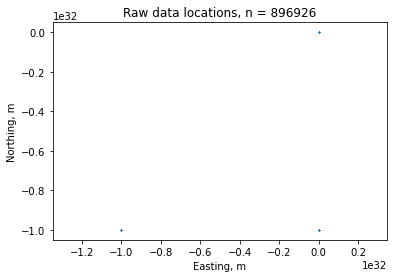

In [23]:
# plot RAD raw data locations
plt.plot(linedata[0].X_UTM_TRIM,linedata[0].Y_UTM_TRIM,'.',markersize=.1)
plt.xlabel('Easting, m')
plt.ylabel('Northing, m')
plt.axis('Equal')
plt.title('Raw data locations, n = ' + str(linedata[0].index.size))

Text(0.5, 1.0, 'Raw data locations, n = 896926')

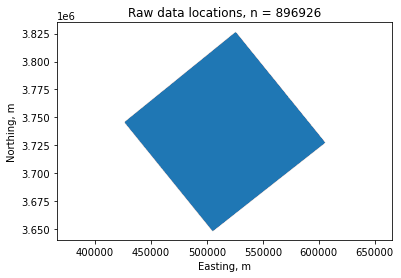

In [26]:
# plot RAD raw data locations
x = linedata[0].X_UTM_WIN
y = linedata[0].Y_UTM_WIN

plt.plot(x[x>dummy_val],y[x>dummy_val],'.',markersize=.05)
plt.xlabel('Easting, m')
plt.ylabel('Northing, m')
plt.axis('Equal')
plt.title('Raw data locations, n = ' + str(linedata[0].index.size))

Text(0, 0.5, 'cps')

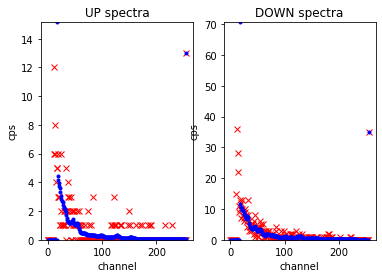

In [28]:
# plot some spectra for a given index [i]
i=90000

x = linedata[0].spectra_256[:]
y1 = linedata[0].SPC_UP[i,:]
y2 = linedata[0].NAS_SPC_UP[i,:]
y3 = linedata[0].SPC_DOWN[i,:]
y4 = linedata[0].NAS_SPC_DOWN[i,:]

y_UPmax = np.max(y2)
y_DNmax = np.max(y4)

plt.subplot(1,2,1)
plt.plot(x,y1,'rx')
plt.plot(x,y2,'b.')
plt.ylim((0,y_UPmax))
plt.title('UP spectra')
plt.xlabel('channel')
plt.ylabel('cps')
plt.subplot(1,2,2)
plt.plot(x,y3,'rx')
plt.plot(x,y4,'b.')
plt.ylim((0,y_DNmax))
plt.title('DOWN spectra')
plt.xlabel('channel')
plt.ylabel('cps')

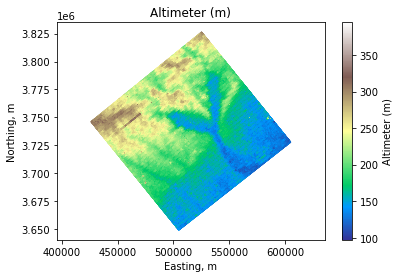

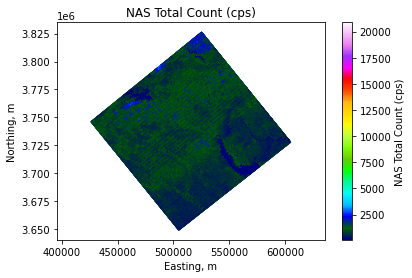

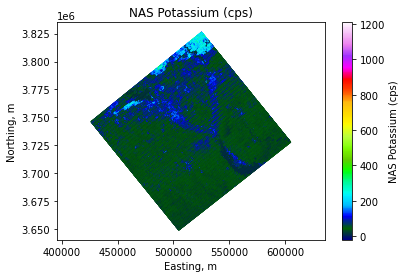

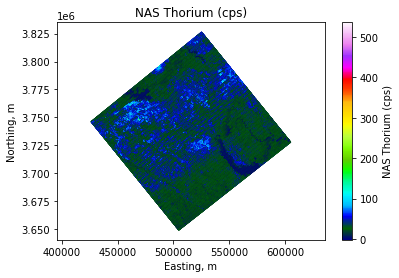

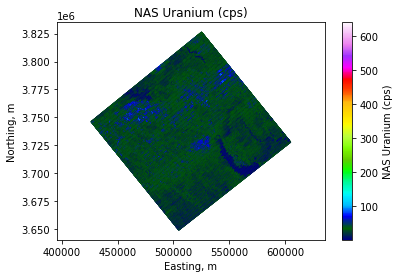

<Figure size 432x288 with 0 Axes>

In [30]:
# plot some channels

plots = [['ALT','terrain', 'Altimeter (m)'],
         ['NAS_TC','gist_ncar', 'NAS Total Count (cps)'],
         ['NAS_K','gist_ncar', 'NAS Potassium (cps)'],
         ['NAS_TH','gist_ncar', 'NAS Thorium (cps)'],
         ['NAS_U','gist_ncar', 'NAS Uranium (cps)']]

#appears to be an issue with X_UTM_TRIM, using SPEC instead
x = linedata[0].X_UTM_SPEC
y = linedata[0].Y_UTM_SPEC

for chan, clr_map, label in plots:
    z = linedata[0][chan]
    plt.scatter(x[x>dummy_val],y[x>dummy_val],c=z[x>dummy_val],s=.05,cmap=clr_map)
    cbar=plt.colorbar()
    plt.xlabel('Easting, m')
    plt.ylabel('Northing, m')
    plt.axis('Equal')
    cbar.set_label(label)
    plt.title(label)
    plt.figure()

In [51]:
linedata[0].variables.values
#linedata[0].variables
#linedata[0].index.size

<bound method Mapping.values of Frozen({'spectra_256': <xarray.IndexVariable 'spectra_256' (spectra_256: 256)>
array([  0,   1,   2, ..., 253, 254, 255])
Attributes:
    standard_name:  spectra_256
    long_name:      radiometric spectra
    units:          cps
    null_value:     -1e+32, 'x': <xarray.Variable (index: 896926)>
array([604640.32282544, 604601.68117331, 604562.74165173, ...,
       504547.19605948, 504498.33425242, 504449.13702377])
Attributes:
    _FillValue:           nan
    standard_name:        projection_x_coordinate
    long_name:            UTM Easting - WGS84, UTM Zone 17N (metres) - trimme...
    units:                meters
    null_value:           -1e+32
    _CoordinateAxisType:  GeoX, 'y': <xarray.Variable (index: 896926)>
array([3727905.9293346 , 3727955.52483883, 3728004.81659693, ...,
       3649882.5098901 , 3649842.11447309, 3649802.06168379])
Attributes:
    _FillValue:           nan
    standard_name:        projection_y_coordinate
    long_name:     

In [96]:
#OK let's see if we can send this to pandas
df = linedata[0].to_dataframe()
df

MemoryError: Unable to allocate 1.71 GiB for an array with shape (256, 896926) and data type float64

In [ ]:
# read file into pandas; note that can take over 1 minute depending on the size of the CSV file and computing power.
#for more on pandas visit https://pandas.pydata.org/

csvDataFrame = pd.read_csv(csvFilePath1, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
csvDataFrame

In [30]:
# now get an array of the header names and print them out.
csvHeaderList = list(csvDataFrame.columns.values)
sortedCsvHeaderList = sorted(csvHeaderList)
ddFieldNames = datdicDataFrame['Field_Name'].tolist()
sortedDdFieldNames = sorted(ddFieldNames)
print ('-------------------------------------\nSORTED CSV HEADER LIST\n-------------------------------------') 
for i in range(len(sortedCsvHeaderList)):
 print (str(i) + ',' + sortedCsvHeaderList[i])
print ('\n------------------------------------\nSORTED DATA DICTIONARY HEADER LIST\n------------------------------------') 
for i in range(len(sortedDdFieldNames)):
 print (str(i) + ',' + sortedDdFieldNames[i])
print ('\n-------------------------------------\nLIST COMPARISION\n------------------------------------')   
for i in range(len(sortedCsvHeaderList)):
 print (str(i) + ',' + sortedCsvHeaderList[i] + '::' + sortedDdFieldNames[i])

NameError: name 'csvDataFrame' is not defined

In [ ]:
#Creat Min and Max Arrays
#Calculate Min Max and print result:
csvMax = []
csvMin = []

#Loop through arrays and callculate values
for i in range(len(csvHeaderList)):
 print (csvHeaderList[i] + ': ' + str(i))
 strCol = csvHeaderList[i]
 csvMax.append(csvDataFrame[strCol].max())
 csvMin.append(csvDataFrame[strCol].min())
 print ('Min. Value ' + csvHeaderList[i] + ' :' + str(csvMin[i]))
 print ('Max. Value ' + csvHeaderList[i] + ' :' + str(csvMax[i]))

APEX_2018_2020_bNMR_Data.csv

Comma Separated Value (CSV) file containing spin-echo decay data.

attrlabl:  SiteID
attrdef:  Instrument site name
	<udom>		|--> alphanumeric names for measurement sites

attrlabl:  Lon_WGS84
attrdef:  Longitude, WGS84
	<rdom>
		<rdomMIN>	|--> -148.323624
		<rdomMAX>	|--> -148.320929

attrlabl:  Lat_WGS84
attrdef:  Latitude, WGS84
	<rdom>
		<rdomMIN>	|--> 64.695863
		<rdomMAX>	|--> 64.696600

attrlabl:  Altitude_m
attrdef:  Ground surface elevation, WGS84 Ellipsoid
	<rdom>
		<rdomMIN>	|--> 131.11
		<rdomMAX>	|--> 133.59

attrlabl:  X_UTMz6
attrdef:  Easting, WGS84 UTM Zone 6N
	<rdom>
		<rdomMIN>	|--> 436878.79235
		<rdomMAX>	|--> 437005.66454

attrlabl:  Y_UTMz6
attrdef:  Northing, WGS84 UTM Zone 6N
	<rdom>
		<rdomMIN>	|--> 7175217.07208
		<rdomMAX>	|--> 7175301.13901

attrlabl:  Depth_m
attrdef:  Depth of measurement below ground level
	<rdom>
		<rdomMIN>	|--> -0.250
		<rdomMAX>	|--> 2.125

attrlabl:  Time_s
attrdef:  Spin-echo decay time
	<rdom>
		<rdomMIN>	|--> 0.0005250000
		<rdomMAX>	|--> 0.2995275000

attrlabl:  Water_Content_%
attrdef:  Total volumetric water content
	<rdom>
		<rdomMIN>	|--> -155.6835104109
		<rdomMAX>	|--> 183.3452339512

attrlabl:  Collection_Date
attrdef:  Measurement date
	<udom>		|--> YYYYMMDD

In [43]:
#OK let's create the entity and attributes from the JSON data dictionary and compare to the results above from the CSV
entAttText = ''
csvHeaderListLength = len(arrFields)
#print ('Length of Entity Description Array: ' + str(len(csvEntityDescription)))
#print ('Length of Header List: ' + str(len(magHeaderList)))

for i in range(csvHeaderListLength): #csvHeaderListLength
 print (arrFields[i] + ': ' + str(i))
 strCol = arrFields[i]
 print ('Min. Value ' + arrFields[i] + ' :' + str(arrCsvMin[i]))
 print ('Max. Value ' + arrFields[i] + ' :' + str(arrCsvMax[i]))

 print ('Entt Desc. ' + arrDescription[i])
 print ('Att Unit ' + arrUnit[i] + '\n')
 entAtti = '\n\t\t\t\t<attr>\n\t\t\t\t\t<attrlabl>' + strCol + '</attrlabl>\n' \
        + '\t\t\t\t\t<attrdef>' + arrDescription[i] + '</attrdef>' \
        + '\n\t\t\t\t\t<attrdefs>Terraquest, Ltd</attrdefs>' \
        + '\n\t\t\t\t\t<attrdomv>\n\t\t\t\t\t\t<rdom>\n\t\t\t\t\t\t\t<rdommin>'+ str(arrCsvMin[i]) + '</rdommin>\n\t\t\t\t\t\t\t<rdommax>' \
        + str(arrCsvMax[i]) + '</rdommax>\n\t\t\t\t\t\t\t' + '<attrunit>' + arrUnit[i] + '</attrunit>\n\t\t\t\t\t\t</rdom>\n\t\t\t\t\t\t' \
        + '</attrdomv>\n' \
        + '\t\t\t\t</attr>'
 entAttText = entAttText + entAtti
    
entAttText = entAttText  + '\n\t\t</detailed>\n' 

csvAttributes = entAttText

print ('\nEntity and Attribute Text:\n' + csvAttributes)

ALT: 0
Min. Value ALT :97.08120135024149
Max. Value ALT :394.8103957164786
Entt Desc. WGS84 Altitude (metres AMSL)
Att Unit metres AMSL

AZIMUTH: 1
Min. Value AZIMUTH :0.2635631978130417
Max. Value AZIMUTH :359.74076644320996
Entt Desc. Aircraft Heading (range
Att Unit deg

DATE: 2
Min. Value DATE :2020.188524590164
Max. Value DATE :2020.5792349726776
Entt Desc. Flight Date (DD/MM/YYYY format - ASCII)
Att Unit DD/MM/YYYY

FID: 3
Min. Value FID :36419.876
Max. Value FID :83526.87599999999
Entt Desc. Fiducial (UTC seconds)
Att Unit UTC seconds

FK_FIN: 4
Min. Value FK_FIN :-49.690068479649696
Max. Value FK_FIN :488.3504010964484
Entt Desc. Final Corrected Potassium (cps)
Att Unit cps

FLIGHT: 5
Min. Value FLIGHT :1075.0
Max. Value FLIGHT :1161.0
Entt Desc. Flight Number
Att Unit int

FTC_FIN: 6
Min. Value FTC_FIN :-189.68210091028877
Max. Value FTC_FIN :17565.827167430692
Entt Desc. Final Corrected Total Count (cps)
Att Unit cps

FTH_FIN: 7
Min. Value FTH_FIN :-10.963029575150365
Max. Va

In [44]:
#Get the names of the file items in ScienceBase:
#print(item_json['files'])
# Create Arrays of process information
jpg_files = []
jpg_url = []
jpg_size = []

for item in item_json['files']:
    print (item['name'],', ', item['url'], ', ', item['size'])
    jpg_files.append(item['name'])
    jpg_url.append(item['url'])
    jpg_size.append(int(item['size']))

SC19C0010_USGS_SCAROLINAII_FALLZONE_RadiometricFlightLineData.zip ,  https://sciencebase.usgs.gov/manager/item/62291b66d34ee0c6b38b88ea/file/cl16odzad001n0rmn9ca44j8o ,  2600227912
SC19C0010_USGS_DataDictionary_SCAROLINA_II_SPEC_gdb.json ,  https://www.sciencebase.gov/catalog/file/get/62291b66d34ee0c6b38b88ea?f=__disk__f3%2Fe3%2Fe3%2Ff3e3e3a45c83fdc2ff36777f5ad79f4bbb0c1ba0 ,  16152
SC19C0010_SCII_FallZone_RadChild_FGDCmetadata.xml ,  https://www.sciencebase.gov/catalog/file/get/62291b66d34ee0c6b38b88ea?f=__disk__b7%2F33%2F13%2Fb733137fe383fd217c033b57a0a4ba0a14fdd9b7 ,  14955


###### d.	If applicable, geographic coordinates are provided, and they match location keywords in metadata and also agree with the data; 

In [37]:
# Get the bounding coordinates from the metadata
# Compare this to the metadata Entity and Atribute item
for bounding in root.iter('bounding'):
 westbc = bounding.find('westbc')
 print ('westbc: ' + westbc.text)
 eastbc = bounding.find('eastbc')
 print ('eastbc: ' + eastbc.text)
 northbc = bounding.find('northbc')
 print ('northbc: ' + northbc.text)
 southbc = bounding.find('southbc')
 print ('southbc: ' + southbc.text)

westbc: -81.79499391
eastbc: -79.87094286
northbc: 34.57700389
southbc: 32.98369652


> - **Generally limit lat and longs to 6 significant figures or less**

##### e.	Keywords accurately represent the data and include terms from standard vocabularies whenever possible (such as the USGS Thesaurus, http://www.usgs.gov/science/services.html or  the Biocomplexity Thesaurus, http://www.usgs.gov/core_science_systems/csas/biocomplexity_thesaurus

In [38]:
#Load Theme Keywords
printmd ('***Theme Keywords*** <br> ===============')
for theme in root.iter('theme'):
 themekt = theme.find('themekt')
 printmd ("**" + themekt.text + "**")
 for themekey in theme.findall('themekey'):
        printmd('- ' + themekey.text)

***Theme Keywords*** <br> ===============

**USGS Thesaurus**

- geophysics

- geospatial datasets

- aeromagnetic surveying

- aeroradiometric surveying

- potassium

- uranium

- thorium

**none**

- Geology, Geophysics, and Geochemistry Science Center

- GGGSC

- Earth Mapping Resources Initiative

- EarthMRI

- horizontal magnetic gradiometry

- airborne geophysical survey

- Mineral Resources Program

- MRP

- Earthquake Hazards Program

- EHP

- National Cooperative Geologic Mapping Program

- NCGMP

- U.S. Geological Survey

- USGS

**ISO 19115 Topic Category**

- geoscientificInformation

- economy

In [39]:
#Load Place Keywords
printmd ('***Place Keywords*** <br> ==============')
for place in root.iter('place'):
 placekt = place.find('placekt')
 printmd ("**" + placekt.text + "**")
 for placekey in place.findall('placekey'):
        printmd('- ' + placekey.text)

***Place Keywords*** <br> ==============

**Geographic Names Information System (GNIS)**

- Aiken County, Bamberg County, Barnwell County, Calhoun County, Clarendon County, Colleton County, Dorchester County, Edgefield County, Fairfield County, Kershaw County, Lee County, Lexington County, Orangeburg County, Richland County, Saluda County, Sumter County, Williamsburg County

- Columbia

**Common geographic areas**

- United States

- South Carolina

> - ** No desired changes to keywords **
> - ISO 19115 Topic Category - Success	All 2 keywords are valid
> - USGS Thesaurus - All 3 keywords are valid
> - Suggest terms:	
>  - Match: "permafrost" (1370)
>  - Match: "hydrologic processes" (1667)

##### f. Information about data processing steps, methodology, and lineage are included in the record and match any associated publications. Could a scientist or technician recreate the final data set from the descriptions? Can documentation about methodology be easily found and used? Are processing software and versions identified, if applicable?;

In [40]:
#Load process steps
for procstep in root.iter('procstep'):
 procdesc = procstep.find('procdesc')
 print (procdesc.text)
 procdate = procstep.find('procdate')
 print ('- ' + procdate.text + '\n')

The airborne survey was flown under contract to the U.S. Geological Survey by Terraquest, Ltd from May 11, 2020 to July 18, 2020. The magnetic data were acquired with 3 Scintrex CS-3 cesium vapour magnetometers. The radiometric data were acquired with radiation Solutions RS-500 gamma ray spectrometer. Data were collected along northwest-southeast flight lines spaced 400 meters (m) apart with northeast-southwest tie lines flown every 4000 m. A mean terrain clearance of 127 m was maintained; in some areas safety dictated a higher elevation. A total of 32,447 line-kilometers (km) of data were collected.
- 20200731

1) Energy Windows, 2) NASVD Noise Reduction, 3) Aircraft and Cosmic Background Correction, 4) Atmospheric Background Correction, 5) Compton Stripping, 6) Altitude Attenuation Correction, 7) Microleveling, 8) Conversion to Ground Units, 9) Gridding, 10) Radiometric Database
- 20210420

Final data and contractor's report were accepted and received by USGS from Terraquest Ltd
- 20

> - **No Desired Changes to Process Description**

##### g. The metadata provides complete and current information about how to use the data files – access instructions, unusual software requirements, data models, definitions of terms, size of the data, etc;

> - **Not applicable on landing page for this data release.**  The only data on the landing page is a SB Arc GIS service described in the Eand A section appropriately.

###### h.	The data quality section adequately describes the procedures used to ensure the quality of the data;

In [41]:
#Load data quality items
for attracc in root.iter('attracc'):
 attraccr = attracc.find('attraccr')
 printmd ('- attraccr <br> ' + attraccr.text)
for dataqual in root.iter('dataqual'):
 logic = dataqual.find('logic')
 printmd ('- logic <br> ' + logic.text)
for dataqual in root.iter('dataqual'):
 complete = dataqual.find('complete')
 printmd ('- complete <br> ' + complete.text)
for horizpa in root.iter('horizpa'):
 horizpar = horizpa.find('horizpar')
 printmd ('- horizpar <br> ' + horizpar.text)
for vertacc in root.iter('vertacc'):
 vertaccr = vertacc.find('vertaccr')
 printmd ('- vertaccr <br> ' + vertaccr.text)

- attraccr <br> Daily quality control of raw radiometric and magnetic data was performed by the contractor and is described in the contractor report. Further quality control measures occurred post flight by the contractor and USGS scientist-in-charge before approval and acceptance of the final data. The data have been peer reviewed and compared with related ancillary data.

- logic <br> Data were visually inspected for reasonableness and spatial consistency.

- complete <br> Data set is considered complete for the information presented, as described in the abstract. Users are advised to read the rest of the metadata record carefully for additional details. All data as part of this collection were included in this data release for the region and time period specified in this metadata.

- horizpar <br> Field quality control and assurance procedures were undertaken by the Terraquest field crew and are described in the contractor's report included with this data release.

- vertaccr <br> Field quality control and assurance procedures were undertaken by the Terraquest field crew and are described in the contractor's report included with this data release.

> **No desired changes.**

###### i.	Access constraints, use constraints, and distribution liability statements are included and are consistent with USGS policy:
- desired accconst:<br>
None. Please see 'Distribution Info' for details.


- desired useconst:<br>
Any use of trade, firm, or product names is for descriptive purposes only and does not imply endorsement by the U.S. Government.  Although these data have been processed successfully on a computer system at the U.S. Geological Survey (USGS), no warranty expressed or implied is made regarding the display or utility of the data for other purposes, nor on all computer systems, nor shall the act of distribution constitute any such warranty. The USGS or the U.S. Government shall not be held liable for improper or incorrect use of the data described and/or contained herein.


- desired distliab:<br>
Unless otherwise stated, all data, metadata and related materials are considered to satisfy the quality standards relative to the purpose for which the data were collected. Although these data and associated metadata have been reviewed for accuracy and completeness and approved for release by the U.S. Geological Survey (USGS), no warranty expressed or implied is made regarding the display or utility of the data for other purposes, nor on all computer systems, nor shall the act of distribution constitute any such warranty.

In [42]:
# Load liability statements to check against above text
for idinfo in root.iter('idinfo'):
 accconst = idinfo.find('accconst')
 printmd ('- actual accconst: <br> ' + accconst.text)
for idinfo in root.iter('idinfo'):
 useconst = idinfo.find('useconst')
 printmd ('- actual useconst: <br> ' + useconst.text)
for distinfo in root.iter('distinfo'):
 distliab = distinfo.find('distliab')
 printmd ('- actual distliab: <br> ' + distliab.text)    

- actual accconst: <br> None. Please see 'Distribution Info' for details

- actual useconst: <br> Any use of trade, firm, or product names is for descriptive purposes only and does not imply endorsement by the U.S. Government.  Although these data have been processed successfully on a computer system at the U.S. Geological Survey (USGS), no warranty expressed or implied is made regarding the display or utility of the data for other purposes, nor on all computer systems, nor shall the act of distribution constitute any such warranty. The USGS or the U.S. Government shall not be held liable for improper or incorrect use of the data described and/or contained herein. Acknowledgment of the U.S. Geological Survey would be appreciated in products derived from these data.

- actual distliab: <br> Unless otherwise stated, all data, metadata and related materials are considered to satisfy the quality standards relative to the purpose for which the data were collected. Although these data and associated metadata have been reviewed for accuracy and completeness and approved for release by the U.S. Geological Survey (USGS), no warranty expressed or implied is made regarding the display or utility of the data on any other system or for general or scientific purposes, nor shall the act of distribution constitute any such warranty.

> - **No Desired Changes**

##### j.	If the data or metadata have been revised, correct version identification is provided (see: https://www2.usgs.gov/fsp/data_versioning.asp);

> - **Not Applicable**

##### k.	Content is written in a way that is usable and helpful, without use of special formatting or characters that will fail to be transferred to XML (generally metadata should be encoded using UTF-8).**

> - **Yes**